In [56]:
import tensorflow.keras as keras

In [57]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [58]:
from os import pipe
from tensorflow.keras import layers, models
import tensorflow.keras as keras

y_train_onehot = keras.utils.to_categorical(y_train, num_classes = 10)
y_test_onehot = keras.utils.to_categorical(y_test, num_classes = 10)

# imprime os 5 primeiros valores para exemplificar a codificacao
print("### Antes ###")
print(y_train[:5])
print(y_test[:5])

#print("\n### Depois ###")
#print(x_test[:5])
#print(y_test[:5])


print("\n### Depois Shape ###")
print(x_test.shape)
print(y_test.shape)

### Antes ###
[5 0 4 1 9]
[7 2 1 0 4]

### Depois Shape ###
(10000, 28, 28)
(10000,)


In [59]:
# Normalizar os dados
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Aplanar as imagens de 28x28 para 784
x_train_flat = x_train.reshape(-1, 28 * 28)
x_test_flat = x_test.reshape(-1, 28 * 28)

In [18]:
# Criar o modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # A camada de flatten
model.add(layers.Dense(9, activation='relu'))   # Camada oculta
model.add(layers.Dense(10, activation='softmax'))  # Camada de saída para 10 classes
model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

In [61]:
# Criar o modelo 2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Definição de uma camada Dense
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))  # A camada de flatten
dense_layer = Dense(units=64, activation='relu', use_bias=True, kernel_initializer='glorot_uniform', bias_initializer="zeros")
model.add(layers.Dense(10, activation='softmax'))  # Camada de saída para 10 classes
model.compile('adam','categorical_crossentropy', metrics=['categorical_accuracy'])

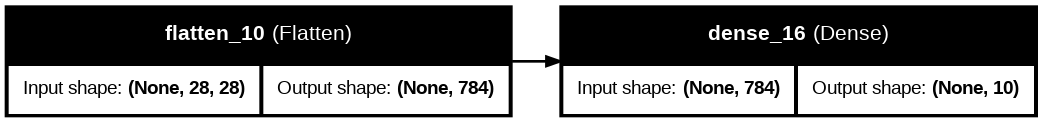

In [62]:
#model=create_model()
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96
)

In [63]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_10 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#history = model.fit(X_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)
history = model.fit(x_train, y_train_onehot, validation_split=.1, epochs=500, verbose=2)

Epoch 1/500
1688/1688 - 5s - 3ms/step - categorical_accuracy: 0.8714 - loss: 0.4921 - val_categorical_accuracy: 0.9267 - val_loss: 0.2737
Epoch 2/500
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9129 - loss: 0.3139 - val_categorical_accuracy: 0.9320 - val_loss: 0.2443
Epoch 3/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9184 - loss: 0.2915 - val_categorical_accuracy: 0.9370 - val_loss: 0.2353
Epoch 4/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9216 - loss: 0.2808 - val_categorical_accuracy: 0.9370 - val_loss: 0.2303
Epoch 5/500
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9238 - loss: 0.2740 - val_categorical_accuracy: 0.9393 - val_loss: 0.2259
Epoch 6/500
1688/1688 - 3s - 2ms/step - categorical_accuracy: 0.9252 - loss: 0.2681 - val_categorical_accuracy: 0.9377 - val_loss: 0.2276
Epoch 7/500
1688/1688 - 2s - 1ms/step - categorical_accuracy: 0.9261 - loss: 0.2647 - val_categorical_accuracy: 0.9380 - val_loss: 0.2240
Epoch 8/500
1688/1688 - 3s - 1ms/s

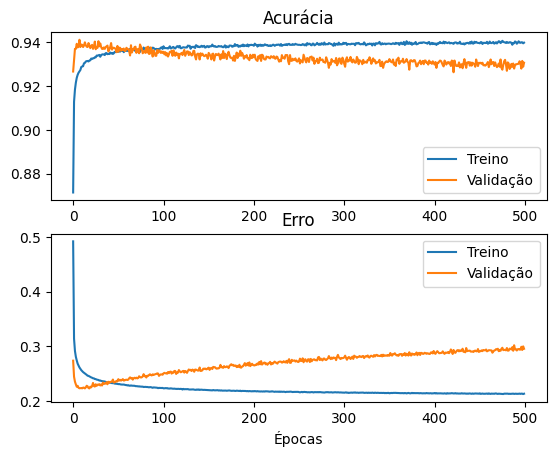

In [65]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2,1)

#  "Accuracy"
axes[0].plot(history.history['categorical_accuracy'])
axes[0].set_title('Acurácia')
# "Loss"
axes[1].plot(history.history['loss'])
axes[1].set_title('Erro')

if 'val_loss' in history.history.keys():
  axes[0].plot(history.history['val_categorical_accuracy'])
  axes[1].plot(history.history['val_loss'])
  axes[0].legend(['Treino', 'Validação'])
  axes[1].legend(['Treino', 'Validação'])

plt.xlabel('Épocas')
plt.show()

In [66]:
#Calculando classes preditas para os valores de teste

y_pred = model.predict(x_test)
print(y_pred)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[[5.2271807e-19 3.6333003e-25 7.2726195e-22 ... 9.9734533e-01
  1.5728270e-06 4.0356885e-05]
 [1.8383213e-09 8.8773788e-09 9.8278648e-01 ... 0.0000000e+00
  2.2685649e-09 8.4077908e-45]
 [1.5413000e-09 9.9621373e-01 2.4709171e-03 ... 3.9278543e-16
  7.7051093e-04 3.8062655e-05]
 ...
 [2.5635334e-12 3.1979907e-12 2.0977670e-07 ... 7.9343206e-04
  9.6243862e-03 1.5771706e-02]
 [4.0836925e-23 5.9414975e-20 2.5839764e-12 ... 1.7355014e-12
  4.2969836e-03 5.0089550e-19]
 [8.4045505e-16 1.0812961e-30 1.0131215e-05 ... 0.0000000e+00
  1.7927124e-15 1.0225260e-28]]


In [67]:
# Comparando os valores preditos com os reais
y_pred_onehot = y_pred.argmax(axis=1)
print('Classes reais:\t\t', y_test)
print('Classes preditas:\t', y_pred_onehot)

Classes reais:		 [7 2 1 ... 4 5 6]
Classes preditas:	 [7 2 1 ... 4 5 6]


In [68]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_onehot))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.93      0.88      0.90      1032
           3       0.92      0.89      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.86      0.89      0.88       892
           6       0.95      0.94      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.86      0.89      0.87       974
           9       0.93      0.89      0.91      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_onehot)
print(cm)

[[ 954    0    1    2    4    9    6    2    2    0]
 [   0 1109    6    1    0    2    3    2   12    0]
 [   8   11  907   20   11    7   11    8   45    4]
 [   5    2   18  896    3   47    2   11   22    4]
 [   3    4    8    4  917    1    8    7    8   22]
 [  11    4    3   18    7  795   13    8   30    3]
 [  12    3    9    3    5   21  901    1    3    0]
 [   1    9   24    9    3    2    0  949    4   27]
 [  10   14    3   17    6   30    9   11  864   10]
 [   9    9    1    8   30    9    0   33   14  896]]


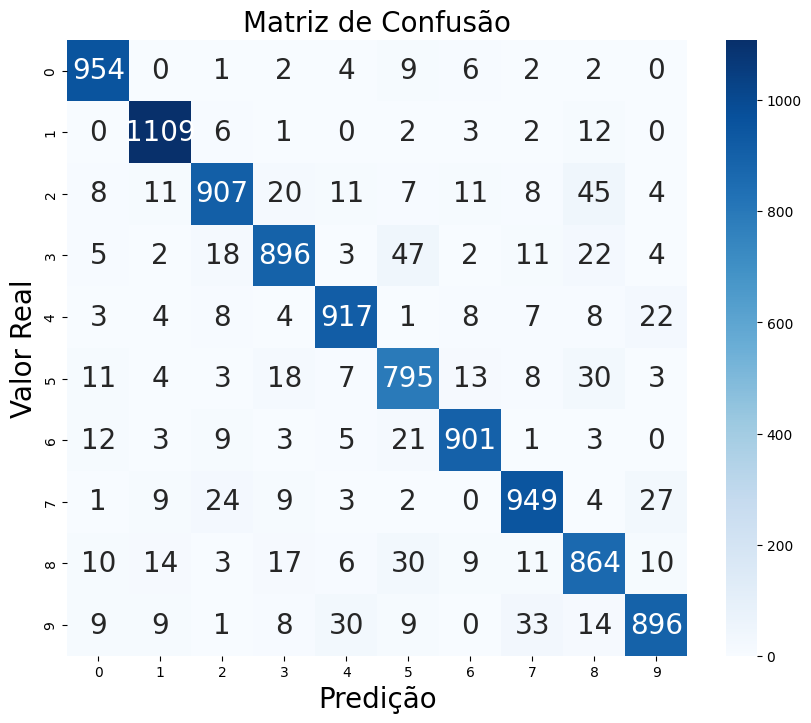

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', annot_kws={"size": 20})  # Aumenta o tamanho da fonte das anotações
plt.xlabel('Predição', fontsize=20)
plt.ylabel('Valor Real', fontsize=20)
plt.title('Matriz de Confusão', fontsize=20)
plt.show()